# Simulate Gamma Distribution from Sample
Using Julia, fit a data sample to a Gamma distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. The gamma distribution is useful for modeling the time until the *k-th* event occurs. It can also be used to model aggregations, such as the cost of insurance claims and the amount of rainfall accumulated in a reservoir.

## 0. Import packages and define SimulateGammaDistributionFromSample function
Install (if necessary) and import the functions necessary to run the SimulateGammaDistributionFromSample function. Then define the function for later use. 

In [12]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateGammaDistributionFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    Param_GammaDistSim = fit(Gamma, dataframe[:, column_name])
    println("The shape parameter (α) used in simulation: ", Param_GammaDistSim.α)
    println("The mean time between events (θ) used in simulation: ", Param_GammaDistSim.θ)
    # Conduct simulation
    Arr_GammaDistSim = rand(Param_GammaDistSim, trials, 1)
    DF_GammaDistSim = DataFrame(Arr_GammaDistSim, :auto)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_GammaDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Outcome (Gamma Distribution)"
        p = histogram(
            DF_GammaDistSim[:, "x1"], 
            bins= :scott, 
            fillalpha= 0.4, 
            label= "Simulated Time", 
            title= title_for_plot, 
            xlabel=column_name
        )
        plot!(
            kde_simulation.x, 
            kde_simulation.density .* length(DF_GammaDistSim[:, "x1"]) .* 0.5,
            linewidth= 3, 
            color= 1, 
            label= "Density of Simulation"
        )
        plot!(
            kde_sample.x, 
            kde_sample.density .* length(DF_GammaDistSim[:, "x1"]) .* 0.5, 
            alpha= 0.6, 
            linewidth= 3, 
            color= 2, 
            label= "Density of Sample"
        )
        display(p)
    end
    # Return simulation results
    return DF_GammaDistSim
end

SimulateGammaDistributionFromSample (generic function with 3 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [4]:
Arr_RandomNumbers = rand(1:10, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

,x1
,Int64
1,3
2,6
3,10
4,5
5,1
6,2
7,7
8,5
9,6


## 2. Use the SimulateGammaDistributionFromSample function
Use the SimulateGammaDistributionFromSample function to simulate a Bernoulli distribution from your sample dataset.

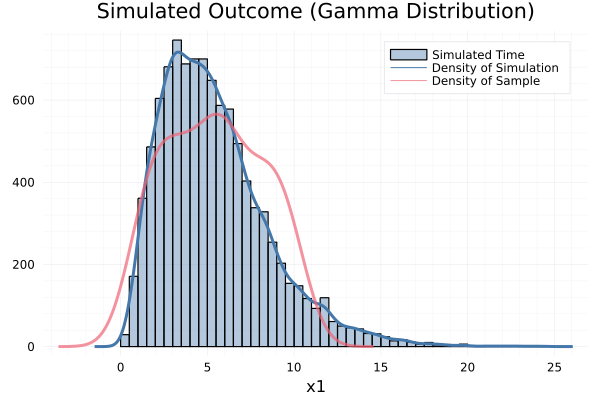

The shape parameter (α) used in simulation: 2.9576278122130164
The mean time between events (θ) used in simulation: 1.8257875374655415


,x1
,Float64
1,8.08467
2,8.09527
3,11.394
4,4.0612
5,7.69838
6,6.55992
7,7.58788
8,11.6403
9,4.57265


In [13]:
DF_Sim = SimulateGammaDistributionFromSample(DF_RandomNumbers, "x1")